## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2002-1-1’ until today.

In [4]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import yfinance

yfinance.pdr_override()


In [10]:
ativos = ['ITSA4.SA', 'RAIZ4.SA', '^BVSP', 'KLBN3.SA']

data_inicial = "2023-01-02"
data_final = "2023-12-30"

tabela_cotacoes = pdr.get_data_yahoo(ativos, data_inicial, data_final)['Adj Close'];

display(tabela_cotacoes);

[*********************100%%**********************]  4 of 4 completed


Ticker,ITSA4.SA,KLBN3.SA,RAIZ4.SA,^BVSP
Date,,,,
2023-01-02,7.212890,3.747851,3.320465,106376.0
2023-01-03,7.031705,3.766451,3.132868,104166.0
2023-01-04,7.092100,3.812950,3.114108,105334.0
2023-01-05,7.195636,3.822249,3.029690,107518.0
2023-01-06,7.316425,3.785050,3.020310,108836.0
...,...,...,...,...
2023-12-21,9.795241,4.323721,4.030000,132182.0
2023-12-22,9.940716,4.344549,4.200000,132753.0
2023-12-26,9.969810,4.364387,4.140000,133533.0


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

In [14]:
tabela_cotacoes_normalizada = (tabela_cotacoes / tabela_cotacoes.iloc[0])

display(tabela_cotacoes_normalizada)

Ticker,ITSA4.SA,KLBN3.SA,RAIZ4.SA,^BVSP
Date,,,,
2023-01-02,1.000000,1.000000,1.000000,1.000000
2023-01-03,0.974880,1.004963,0.943503,0.979225
2023-01-04,0.983254,1.017370,0.937853,0.990205
2023-01-05,0.997608,1.019851,0.912429,1.010736
2023-01-06,1.014354,1.009926,0.909605,1.023126
...,...,...,...,...
2023-12-21,1.358019,1.153654,1.213686,1.242592
2023-12-22,1.378188,1.159211,1.264883,1.247960
2023-12-26,1.382221,1.164504,1.246813,1.255293


<Axes: xlabel='Date'>

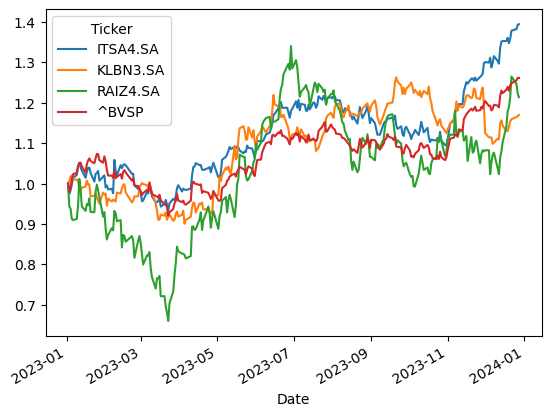

In [12]:
tabela_cotacoes_normalizada.plot()

In [17]:
ind_return = (tabela_cotacoes / tabela_cotacoes.shift(1)) - 1

ind_return.head()


Ticker,ITSA4.SA,KLBN3.SA,RAIZ4.SA,^BVSP
Date,,,,
2023-12-21,0.007984,0.011521,0.020837,0.010535
2023-12-22,0.014852,0.004817,0.042184,0.004320
2023-12-26,0.002927,0.004566,-0.014286,0.005876
2023-12-27,0.007782,0.002273,-0.019324,0.004950
2023-12-28,0.000965,0.002268,-0.007389,-0.000067


In [18]:
ind_return.tail()

Ticker,ITSA4.SA,KLBN3.SA,RAIZ4.SA,^BVSP
Date,,,,
2023-12-21,0.007984,0.011521,0.020837,0.010535
2023-12-22,0.014852,0.004817,0.042184,0.004320
2023-12-26,0.002927,0.004566,-0.014286,0.005876
2023-12-27,0.007782,0.002273,-0.019324,0.004950
2023-12-28,0.000965,0.002268,-0.007389,-0.000067


How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [20]:
anual_return = ind_return.mean() * 250

anual_return

Ticker
ITSA4.SA    0.359087
KLBN3.SA    0.188306
RAIZ4.SA    0.287415
^BVSP       0.249353
dtype: float64

First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

Transform the result into a percentage form. 

Is the return of this portfolio satisfactory?